In [21]:
%matplotlib inline
#load packages and data
import datetime
import MySQLdb
import pandas.io.sql as sql
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 2000)

In [3]:
#get data from db
conn = MySQLdb.connect(host="localhost", port=3306, user="root", db="disney_db") #make db connection
cursor = conn.cursor()

In [10]:
#import preprocessed data for Disneyland
cursor.execute("SELECT hod, meanwait, tweetid, hour, conditions, wind, temp, we_ho FROM dl_test_clean")
rows = cursor.fetchall()
dl_df = pd.DataFrame( [[ij for ij in i] for i in rows] )
dl_df.rename(columns={0: 'timestamp', 1: 'meanwait', 2: 'tweetid',
                     3:'hour', 4:'conditions', 5:'wind', 6:'temp',
                     7:'we_ho'}, inplace=True)
dl_df.head()

,timestamp,meanwait,tweetid,hour,conditions,wind,temp,we_ho
0,2015-08-04 14:00:00,37.672414,12,14,Clear,6.9,89.1,0
1,2015-08-04 15:00:00,36.293103,13,15,Clear,5.8,89.1,0
2,2015-08-04 16:00:00,36.379310,17,16,Clear,8.1,87.1,0
3,2015-08-04 17:00:00,38.448276,8,17,Clear,6.9,82.0,0
4,2015-08-04 18:00:00,35.229885,13,18,Clear,4.6,78.1,0


In [11]:
#import preprocessed data for California Adventure
cursor.execute("SELECT hod, meanwait, tweetid, hour, conditions, wind, temp, we_ho FROM ca_test_clean")
rows = cursor.fetchall()
ca_df = pd.DataFrame( [[ij for ij in i] for i in rows] )
ca_df.rename(columns={0: 'timestamp', 1: 'meanwait', 2: 'tweetid',
                     3:'hour', 4:'conditions', 5:'wind', 6:'temp',
                     7:'we_ho'}, inplace=True)
ca_df.head()

,timestamp,meanwait,tweetid,hour,conditions,wind,temp,we_ho
0,2015-08-04 14:00:00,34.318182,12,14,Clear,6.9,89.1,0
1,2015-08-04 15:00:00,34.431818,13,15,Clear,5.8,89.1,0
2,2015-08-04 16:00:00,34.772727,17,16,Clear,8.1,87.1,0
3,2015-08-04 17:00:00,33.920455,8,17,Clear,6.9,82.0,0
4,2015-08-04 18:00:00,33.409091,13,18,Clear,4.6,78.1,0


In [13]:
#close sql (don't need it anymore)
conn.close()

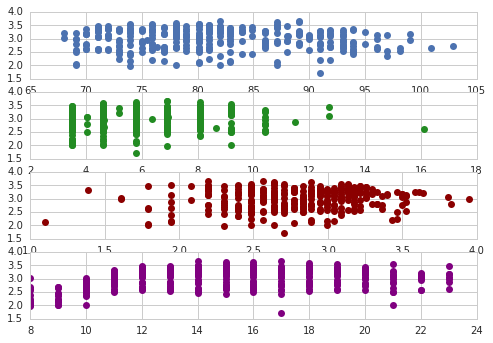

In [74]:
#some EDA plots (Disneyland)
sns.set_style("whitegrid")
sns.plt.figure(1)

sns.plt.subplot(411)
#note log transforms
sns.plt.plot(dl_df['temp'], np.log(dl_df['meanwait']+1), 'o')

sns.plt.subplot(412)
sns.plt.plot(dl_df['wind'], np.log(dl_df['meanwait']+1), 'o', color='forestgreen')

sns.plt.subplot(413)
sns.plt.plot(np.log(dl_df['tweetid']+1), np.log(dl_df['meanwait']+1), 'o', color='darkred')

sns.plt.subplot(414)
sns.plt.plot(dl_df['hour'], np.log(dl_df['meanwait']+1), 'o', color='purple')
sns.plt.show()

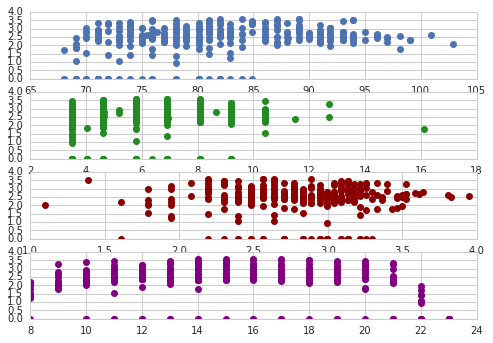

In [75]:
#some EDA plots (California Adventure)
sns.set_style("whitegrid")
sns.plt.figure(1)

sns.plt.subplot(411)
#note log transforms
sns.plt.plot(ca_df['temp'], np.log(ca_df['meanwait']+1), 'o')

sns.plt.subplot(412)
sns.plt.plot(ca_df['wind'], np.log(ca_df['meanwait']+1), 'o', color='forestgreen')

sns.plt.subplot(413)
sns.plt.plot(np.log(ca_df['tweetid']+1), np.log(ca_df['meanwait']+1), 'o', color='darkred')

sns.plt.subplot(414)
sns.plt.plot(ca_df['hour'], np.log(ca_df['meanwait']+1), 'o', color='purple')
sns.plt.show()

In [ ]:
#import scikit etc to build a model of the data